Entrada proporcionada: ['a', 'a', 'b', 'b']
Árbol de derivación generado:
Nodo: S, Tipo: non-terminal
Nodo: S->a, Tipo: terminal
Nodo: S->S, Tipo: non-terminal
Nodo: S->S->a, Tipo: terminal
Nodo: S->S->S, Tipo: non-terminal
Nodo: S->S->b, Tipo: terminal
Nodo: S->S->|, Tipo: non-terminal
Nodo: S->S->ε, Tipo: terminal
Nodo: S->b, Tipo: terminal
Nodo: S->|, Tipo: non-terminal
Nodo: S->ε, Tipo: terminal
Cadena aceptada


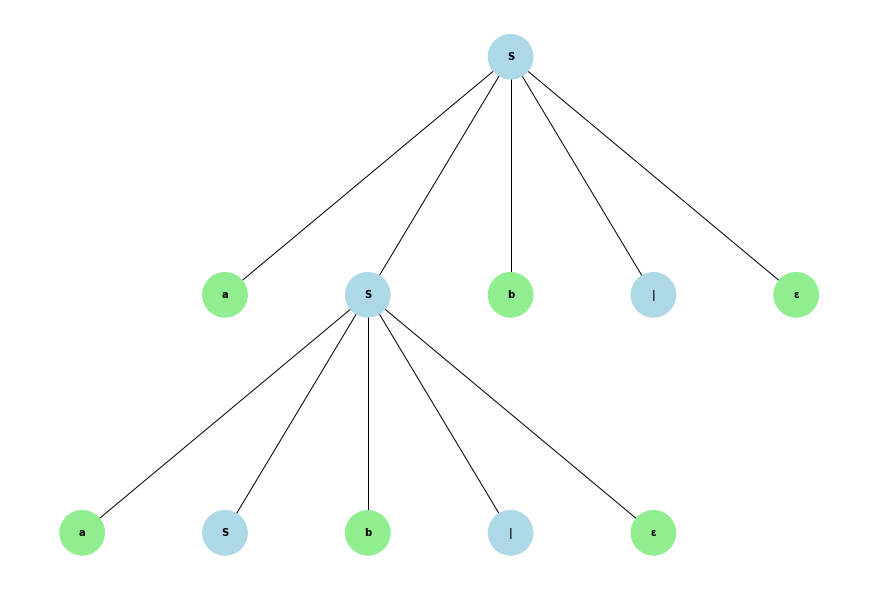

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv

# Paso 1: Leer la gramática desde un archivo
def leer_gramatica(archivo):
    reglas = {}
    with open(archivo, 'r') as file:
        for linea in file:
            linea = linea.strip()
            if '->' in linea:
                lado_izq, lado_der = linea.split('->')
                lado_izq = lado_izq.strip().upper()  # Los símbolos no terminales en mayúsculas
                lado_der = lado_der.strip().split()
                lado_der = [simbolo.upper() if simbolo.isupper() else simbolo.lower() for simbolo in lado_der]  # Ajuste de mayúsculas/minúsculas
                if lado_izq not in reglas:
                    reglas[lado_izq] = []
                reglas[lado_izq].append(lado_der)
    return reglas

# Paso 2: Generar el árbol de derivación basado en la entrada
def generar_arbol_entrada(gramatica, simbolo_inicial, entrada, G=None, nodo_padre=None, indice=0):
    if G is None:
        G = nx.DiGraph()  # Representar el árbol
    if nodo_padre is None:
        nodo_padre = simbolo_inicial
        G.add_node(nodo_padre, label=simbolo_inicial, type='non-terminal')

    # Si llegamos al final de la entrada, detener
    if indice >= len(entrada):
        return G, indice

    # Si el símbolo inicial está en las reglas de producción
    if simbolo_inicial in gramatica:
        # Para cada regla de producción posible
        for produccion in gramatica[simbolo_inicial]:
            temp_indice = indice  # Índice temporal para verificar producción
            es_valido = True  # Bandera para verificar validez de la producción

            for simbolo in produccion:
                if simbolo == 'ε':
                    # Producción de ε (cadena vacía), no avanzamos en el índice
                    nodo_hijo = f"{nodo_padre}->ε"
                    G.add_node(nodo_hijo, label='ε', type='terminal')
                    G.add_edge(nodo_padre, nodo_hijo)
                    continue
                elif simbolo.islower():
                    # Verificar si el símbolo coincide con la entrada
                    if temp_indice < len(entrada) and entrada[temp_indice] == simbolo:
                        nodo_hijo = f"{nodo_padre}->{simbolo}"
                        G.add_node(nodo_hijo, label=simbolo, type='terminal')
                        G.add_edge(nodo_padre, nodo_hijo)
                        temp_indice += 1
                    else:
                        es_valido = False  # Producción no válida para esta entrada
                        break  # Salir del bucle ya que no coincide
                else:
                    # Si es no terminal, aplicar recursión
                    nodo_hijo = f"{nodo_padre}->{simbolo}"
                    G.add_node(nodo_hijo, label=simbolo, type='non-terminal')
                    G.add_edge(nodo_padre, nodo_hijo)
                    G, temp_indice = generar_arbol_entrada(gramatica, simbolo, entrada, G, nodo_hijo, temp_indice)

            # Si la producción es válida y el índice coincide con la longitud de la entrada, detener
            if es_valido and temp_indice > indice:
                return G, temp_indice

    return G, indice

# Paso 3: Visualizar el árbol con disposición jerárquica
def visualizar_arbol(G):
    plt.figure(figsize=(12, 8))  # Tamaño más grande para mejor visualización
    
    # Usar el layout basado en Graphviz para una estructura de árbol
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

    # Diferenciar colores para nodos terminales y no terminales
    node_colors = [G.nodes[node].get('type', 'non-terminal') == 'terminal' for node in G.nodes]
    color_map = {True: 'lightgreen', False: 'lightblue'}
    colors = [color_map[color] for color in node_colors]

    # Usar etiquetas personalizadas para cada nodo
    labels = nx.get_node_attributes(G, 'label')
    
    nx.draw(G, pos, with_labels=True, labels=labels, node_color=colors, node_size=2000, font_size=10, font_weight='bold', arrows=False)
    plt.show()

# Paso 4: Función principal
def main():
    archivo_gramatica = 'gramatica.txt'  # Ruta del archivo de gramática
    simbolo_inicial = 'S'  # Suponemos que 'S' es el símbolo inicial

    # Leer las reglas gramaticales desde el archivo
    gramatica = leer_gramatica(archivo_gramatica)

    # Obtener la entrada del usuario
    entrada = input("Introduce una oración: ").strip().split()
    print("Entrada proporcionada:", entrada)

    # Generar el árbol de derivación para la entrada proporcionada
    G, indice_final = generar_arbol_entrada(gramatica, simbolo_inicial, entrada)

    # Mostrar información explicativa sobre el árbol
    print("Árbol de derivación generado:")
    for node in G.nodes:
        print(f"Nodo: {node}, Tipo: {G.nodes[node].get('type', 'unknown')}")

    # Verificar si la cadena fue aceptada
    if indice_final == len(entrada):
        print("Cadena aceptada")
    else:
        print(f"Cadena no aceptada. Procesados {indice_final} símbolos de {len(entrada)}.")

    # Visualizar el árbol
    visualizar_arbol(G)

# Ejecutar el programa
if __name__ == '__main__':
    main()
     